# Assignment Python 1

### Import Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional for ggplot-like style

### Import Dataset

Pada Assignment Python 1 ini akan digunakan Dataset dari Kaggle yaitu the London Crime. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008 - Dec 2016.

In [3]:
df = pd.read_csv("london_crime_by_lsoa.csv")

df.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


Dataset tersebut berisi variabel-variabel dengan keterangan sebagai berikut :
* lsoa_code : this represents a policing area
* boroug : the london borough for which the statistic is related
* major_category : the major crime category
* minor_category : the minor crime category
* value : the count of the crime for that particular borough, in that particular month
* year : the year of the summary statistic
* month : the month of the summary statistic

## Preprocessing Dataset

In [4]:
# print the dimension of dataset
df.shape 

(13490604, 7)

In [5]:
# melihat tipe objek masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
# cek missing value pada dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Karena semua jumlahnya 0 maka tidak terdapat missing values pada dataset

In [10]:
# melihat number of unique dari setiap kolom
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [11]:
# cek duplikasi data
dups = df.duplicated()
print(dups.any())

False


Setelah cek duplikasi data hasilnya menyatakan "false" sehingga tidak terdapat duplikasi pada dataset

In [12]:
# membuat dataframe baru untuk mengambil kolom borough dan value

df2=df[['borough','value']]
df2.head(3)

,borough,value
0,Croydon,0
1,Greenwich,0
2,Bromley,0


## Line Chart

In [13]:
Year=df['year'].unique()
sums_year=df.groupby('year').sum()
sums=sums_year['value'].to_numpy()
n = len(Year)

In [14]:
for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
 
print("Years:  ")
print(Year)
print("Sum of crimes happened in each year:")
pos1 = np.arange(len(Year))
print(sums)

Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Sum of crimes happened in each year:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


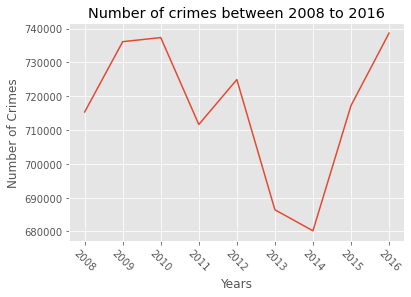

In [15]:
pos1 = np.arange(len(Year))

plt.plot(sums)
plt.xticks(pos1,Year)
plt.title("Number of crimes between 2008 to 2016")
plt.xlabel('Years')
plt.ylabel("Number of Crimes")
plt.xticks(rotation=-45 )

plt.show()

Dari plot di atas dapat kita amati bahwa jumlah kasus kriminalitas di London fluktuatif tiap tahunnya. Dapat dilihat kasus kriminalitas di London menurun dari sekitar 738.000 kasus di tahun 2010 turun hingga 680.000 kasus di tahun 2014. Kemudian terjadi lonjakan kasus kriminalitas lagi di tahun 2015 dan 2016 hingga mencapai jumlah tertinggi yaitu 740.000 kasus.

## Area Plot

Pertanyaan : Membuat visualisasi 5 wilayah yang memiliki jumlah kasus kriminal tertinggi di London (Top 5 borough) dari tahun 2008 - 2016

In [99]:
df2.head()

,borough,value
0,Croydon,0
1,Greenwich,0
2,Bromley,0
3,Redbridge,0
4,Wandsworth,0


In [101]:
df_group = df2.groupby('borough')['value'].sum()
df_group.head()

borough
Barking and Dagenham    149447
Barnet                  212191
Bexley                  114136
Brent                   227551
Bromley                 184349
Name: value, dtype: int64

In [102]:
# mengurutkan borough dari value terbesar

df_top = df_group.sort_values(ascending=False)
df_top5 = df_top.head(5)
df_top5

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: value, dtype: int64

Diperoleh top 5 borough yaitu westminster, lambeth, southwark, camden, dan newham

In [104]:
df_westminster = df[
    (
].groupby(['year'])['value'].sum()

df_westminster = df_westminster.to_frame()

In [105]:
df_westminster = df_westminster.rename(
    columns={
        'value': 'Westminster',
    }
)

df_westminster

,Westminster
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


In [106]:
df_lambeth = df[
    (df['borough']== 'Lambeth')
].groupby(['year'])['value'].sum()

df_lambeth = df_lambeth.to_frame()

In [107]:
df_lambeth = df_lambeth.rename(
    columns={
        'value': 'Lambeth',
    }
)

df_lambeth

,Lambeth
year,
2008,31717
2009,31225
2010,31671
2011,33224
2012,33473
2013,31868
2014,31765
2015,33164
2016,34071


In [108]:
df_southwark = df[
    (df['borough']== 'Southwark')
].groupby(['year'])['value'].sum()

df_southwark = df_southwark.to_frame()

In [109]:
df_southwark = df_southwark.rename(
    columns={
        'value': 'Southwark',
    }
)

df_southwark

,Southwark
year,
2008,33470
2009,30623
2010,31320
2011,30723
2012,30737
2013,31128
2014,28912
2015,30260
2016,31636


In [119]:
df_camden = df[
    (df['borough'] == 'Camden')
].groupby(['year'])['value'].sum()

df_camden = df_camden.to_frame()

In [120]:
df_camden = df_camden.rename(
    columns={
        'value': 'Camden',
    }
)

df_camden

,Camden
year,
2008,32010
2009,31612
2010,31804
2011,33956
2012,31472
2013,28435
2014,27198
2015,29477
2016,29183


In [113]:
df_newham = df[
    (df['borough']== 'Newham')
].groupby(['year'])['value'].sum()

df_newham = df_newham.to_frame()

In [114]:
df_newham = df_newham.rename(
    columns={
        'value': 'Newham ',
    }
)

df_newham

,Newham
year,
2008,29752
2009,28610
2010,30728
2011,27978
2012,30067
2013,27577
2014,28005
2015,29217
2016,30090


In [121]:
df_areatop5 = pd.concat([df_westminster, df_lambeth, df_southwark, df_camden, df_newham], axis=1, sort=False)
df_areatop5

,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [116]:
#Kolom tahun sebagai tabel
label_area = df['year'].unique()

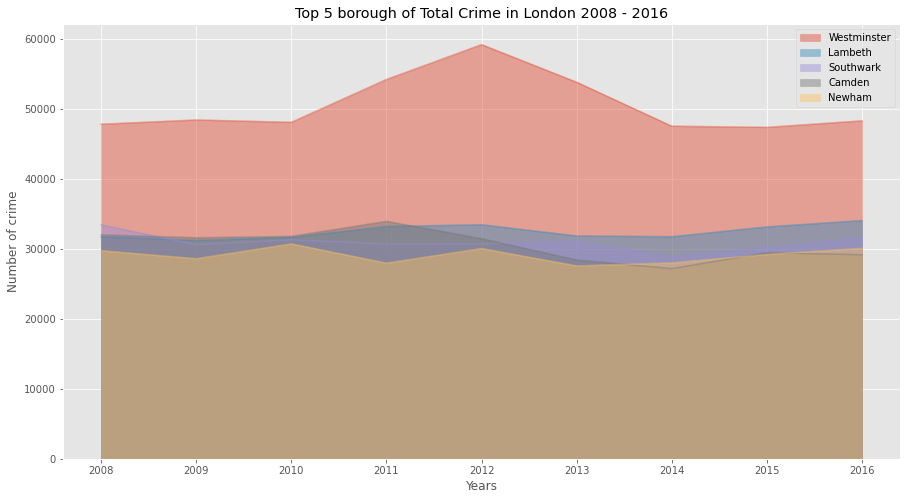

In [136]:
df_areatop5.index = df_areatop5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_areatop5.plot(kind='area', 
            label = label_area,
            stacked=False, 
            alpha = 0.45,
            figsize=(15, 8), # pass a tuple (x, y) size
            )

plt.title('Top 5 borough of Total Crime in London 2008 - 2016')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()

Area plot tersebut memvisualisasikan top 5 borough atau wilayah yang memiliki jumlah kasus kriminal tertinggi di London yaitu Westminster, Lambeth, Southwark, Camden, dan Newham. Dari area plot tersebut dapat dilihat bahwa yang memiliki area terbesar adalah yang berwarna merah yaitu Westminster yang artinya Westminster merupakan wilayah yang memiliki jumlah kasus kriminal tertinggi, wilayah kedua adalah yang berwarna biru yaitu Lambeth, wilayah ketiga adalah yang berwarna ungu yaitu Southwark, wilayah keempat adalah yang berwarna coklat yaitu Camden, dan wilayah kelima adalah yang berwarna kuning yaitu newham.

## Histogram

Pertanyaan : Bagaimana distribusi frekuensi jumlah kasus kriminal dari berbagai wilayah di London pada tahun 2016 ?

In [60]:
year_value = df[(df["year"] == 2016)].groupby(["borough"])["value"].sum()

In [61]:
year_value.head()

borough
Barking and Dagenham    16741
Barnet                  24684
Bexley                  12840
Brent                   26693
Bromley                 20164
Name: value, dtype: int64

In [62]:
count, bin_edges = np.histogram(year_value)

print(count) # frequency count
print(bin_edges) # bin ranges

[ 1  0  6  2 10  8  4  1  0  1]
[  178.   4993.2  9808.4 14623.6 19438.8 24254.  29069.2 33884.4 38699.6
 43514.8 48330. ]


Dataset dipecah menjadi 10 bin. Dari hasil tersebut dapat dirangkum kisaran bin dan distribusi frekuensi jumlah kasus kriminal di tahun 2016. Selanjutnya membuat grafik distribusi ini dengan menyimpan kind=hist ke plot()

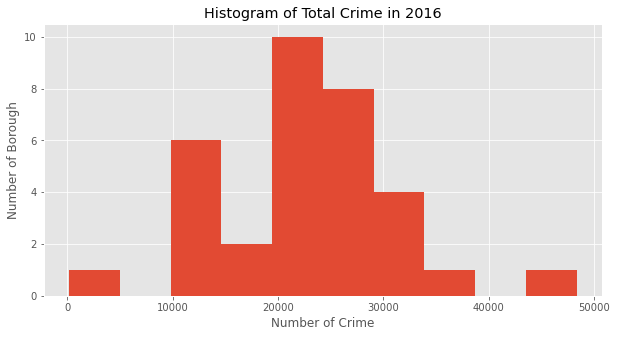

In [63]:
year_value.plot(kind='hist', figsize=(10,5))

plt.title('Histogram of Total Crime in 2016') # add a title to the histogram
plt.ylabel('Number of Borough') # add y-label
plt.xlabel('Number of Crime') # add x-label

plt.show()

Pada plot di atas, sumbu x menunjukkan jumlah kasus kriminal dalam interval 4815.2 , sumbu y mewakili berbagai wilayah di London yang berkontribusi dalam record jumlah kasus kriminal tersebut.

Dari histogram dapat kita lihat di tahun 2016 :
- 1 wilayah memiliki antara 178 hingga 4993.2 jumlah kasus kriminal
- 0 wilayah memiliki antara 4993.2  hingga 9808.4 jumlah kasus kriminal
- 6 wilayah memiliki antara 9808.4 hingga 14623.6 jumlah kasus kriminal
- 2 wilayah memiliki antara 14623.6 hingga 19438.8 jumlah kasus kriminal
- 10 wilayah memiliki antara 19438.8 hingga 24254 jumlah kasus kriminal
- 8 wilayah memiliki antara 24254 hingga 29069.2 jumlah kasus kriminal
- 4 wilayah memiliki antara 29069.2 hingga 33884.4 jumlah kasus kriminal
- 1 wilayah memiliki antara 33884.4 hingga 38699.6 jumlah kasus kriminal
- 0 wilayah memiliki antara 38699.6 hingga 43514.8 jumlah kasus kriminal
- 1 wilayah memiliki antara 43514.8 hingga 48330 jumlah kasus kriminal

## Bar Chart

Pertanyaan : Bandingkan jumlah kasus kriminalitas yang terjadi di London berdasarkan jenis kasusnya dari tahun 2008 - 2016.

In [64]:
label=df['major_category'].unique()
print("The type of crimes that are taking place ")
print(label)

The type of crimes that are taking place 
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [65]:
pos = np.arange(len(label))

In [66]:
totals=df.groupby('major_category').sum()
Totals=totals['value'].to_numpy()
print("Total number of crime that took place in each category: ")
print(Totals)

Total number of crime that took place in each category: 
[ 754293  630938  470765    5325  106349  258873    1273 2661861 1558081]


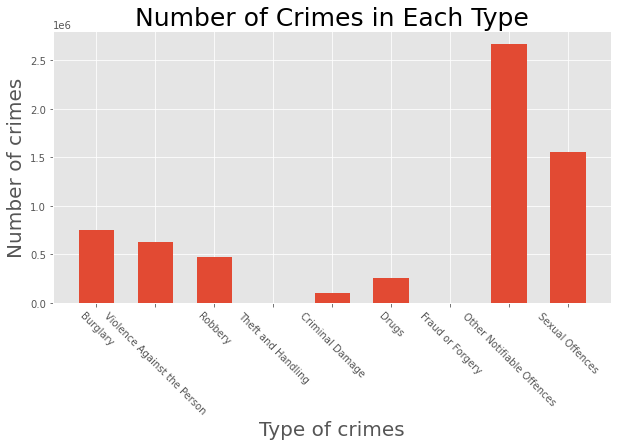

In [67]:
plt.figure(figsize=(10,5))
plt.bar(pos,Totals,width=0.6)
plt.xticks(pos, label)
plt.xlabel('Type of crimes', fontsize=20)
plt.xticks(rotation=-45)
plt.ylabel('Number of crimes', fontsize=20)
plt.title('Number of Crimes in Each Type', fontsize=25)

plt.show()

Bar chart di atas menunjukkan jumlah kriminalitas yang terjadi di London tahun 2008 - 2016 berdasarkan jenisnya.

Dari Bar Chart tersebut dapat dilihat bahwa yang tertinggi yaitu jenis Other Notifiable Offences dan Sexual Offences. Sedangkan yang terendah yaitu Theft and Handling dan Fraud or Forgery.

## Pie Chart

Pertanyaan : Telusuri proprosi (persentase) jumlah kiriminalitas dikelompokkan berdasarkan jenisnya dari tahun 2008 - 2016.

In [68]:
lables=df['major_category'].unique()
lables

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [69]:
sizes=df.groupby(['major_category']).size()
sizes

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

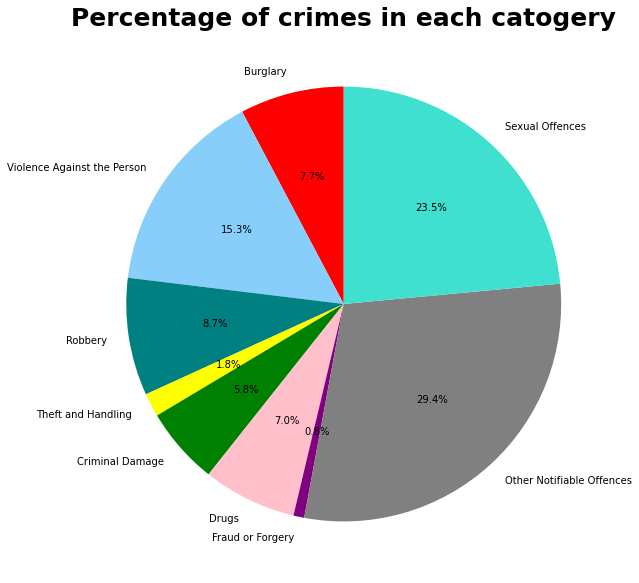

In [70]:
plt.figure(figsize=(20,10))
colors=['red','lightskyblue','teal','yellow', 'green','pink','purple','grey','turquoise']
font1 = {'weight': 'bold',
        'size': 25,
        }

ax = plt.axes()
plt.title('Percentage of crimes in each catogery', fontdict=font1)
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()

Dari Pie Chart diatas dapat dilihat bahwa persentase jenis kriminalitas tertinggi yang terjadi di London dari tahun 2008 - 2016 yaitu Other Notifiable Offences sebesar 29.4%, sedangkan persentase jenis kriminalitas terendah yaitu Fraud or Forgery sebesar 0.8%. 

Persentase jenis kriminalitas lain yaitu sexual offences 23.5%, violence against the person 15.3%, Robbery 8.7%, Burglary 7.7%, Drugs 7.0%, Criminal Damage 5.8%, dan Theft and Handling 1.8%.

## Box Plot

Pertanyaan : Bandingkan distribusi total crime di London tahun 2015 dan 2016

In [71]:
df_2015 = df[
    (df["year"] == 2015) 
].groupby(["month"])["value"].sum()

df_2015 = df_2015.to_frame()

In [72]:
df_2015 = df_2015.rename(
    columns={"value": "2015"}
)

df_2015.head()

,2015
month,
1,57055
2,53316
3,60096
4,56445
5,61038


In [73]:
df_2016 = df[
    (df["year"] == 2016) 
].groupby(["month"])["value"].sum()

df_2016 = df_2016.to_frame()

In [74]:
df_2016 = df_2016.rename(
    columns={"value": "2016"}
)

df_2016.head()

,2016
month,
1,58847
2,56697
3,59167
4,58637
5,63990


In [75]:
df_join = pd.concat([df_2015, df_2016], axis=1, sort=False)
df_join

,2015,2016
month,,
1,57055,58847
2,53316,56697
3,60096,59167
4,56445,58637
5,61038,63990
6,60760,62262
7,61606,65519
8,58056,62666
9,57564,61412


In [76]:
df_join.describe()

,2015,2016
count,12.000000,12.000000
mean,59302.000000,61343.416667
std,2805.226875,2566.996953
min,53316.000000,56697.000000
25%,57436.750000,59087.000000
50%,60428.000000,61837.000000
75%,61180.000000,62850.750000
max,62487.000000,65519.000000


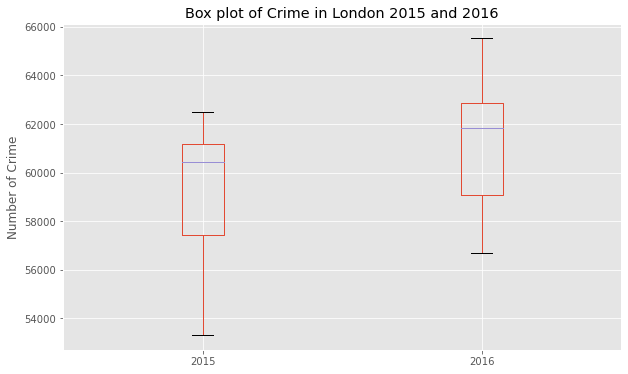

In [77]:
df_join.plot(kind='box', figsize=(10, 6))

plt.title('Box plot of Crime in London 2015 and 2016')
plt.ylabel('Number of Crime')

plt.show()

Terdapat beberapa observasi dari plot di atas:

**Tahun 2015**
- Total crime terendah yaitu 53316 (min), jumlah total crime tertinggi yaitu 62487 (max), dan jumlah rata-rata imigran sekitar 60428 (median).
- 25%  untuk tahun 2015 yaitu total crime 57436.75 (Kuartil pertama).
- 75%  untuk tahun 2015 yaitu total crime 61180 (kuartil ketiga).

**Tahun 2016**
- Total crime terendah yaitu 56697 (min), jumlah total crime tertinggi yaitu 65519 (max), dan jumlah rata-rata imigran sekitar 61837 (median).
- 25%  untuk tahun 2016 yaitu total crime 59087 (Kuartil pertama).
- 75%  untuk tahun 2016 yaitu total crime 62850.75 (kuartil ketiga).

Dapat dilihat bahwa tahun 2015 dan tahun 2016 memiliki rata-rata yang tidak jauh berbeda, sehingga dari bentuk boxplot terlihat range sebaran data keduanya hampir sama.

Namun, boxplot tahun 2016 terletak lebih tinggi daripada tahun 2015 dikarenakan pada tahun 2016 memiliki jumlah kasus yang lebih banyak yaitu jumlah kasus tertinggi sebanyak 65519 yang berarti 3000 kasus lebih banyak dibanding 2015. Selain itu, jumlah kasus terendah di tahun 2016 juga lebih besar dibandingkan tahun 2015 yaitu sebanyak 56697, sedangkan tahun 2015 hanya 53316.

## Scatter Plot

Pertanyaan : Dari plot Line Chart sebelumnya dilihat bahwa jumlah kasus tertinggi yaitu di tahun 2016. Dengan scatter plot, visualisasikan jumlah kasus kriminalitas yang terjadi di London tahun 2016 per bulannya.  

In [78]:
year2016=df.loc[df['year'] == 2016]

In [79]:
months=year2016['month'].unique()
months.sort()

In [80]:
sum_month=year2016.groupby(['month']).sum()

In [81]:
Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


In [82]:
n1 = np.arange(len(months))
xrange=range(1,13)

(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

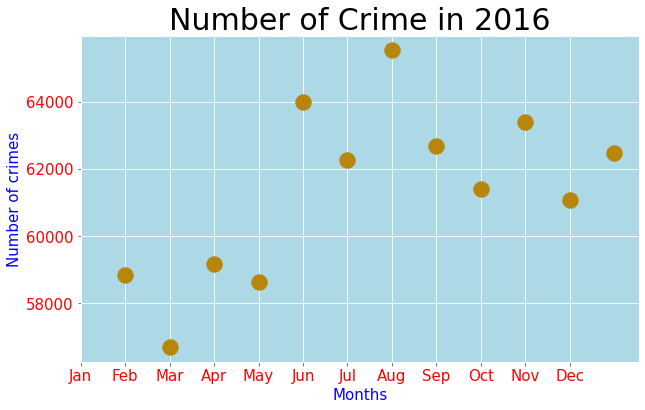

In [83]:
plt.figure(figsize=(10,6))

ax = plt.axes()
ax.set_facecolor("lightblue")

plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("Number of Crime in 2016", fontsize=30)
plt.xlabel('Months',fontsize=15,color='blue')
plt.ylabel('Number of crimes',fontsize=15,color='blue')

plt.xticks(n1,name_of_months)
plt.xticks(color='red',fontsize=15)
plt.yticks(color='red',fontsize=15)

Dari scatter plot tersebut dapat kita amati bahwa ada trend naik setiap bulannya dari januari hingga puncaknya di bulan agustus, kemudian mengalami penurunan di bulan september hingga desember.

Kenaikan terbesar terjadi di bulan juni yaitu dari 59.000 menjadi 64.000 kasus, sedangkan jumlah tertinggi yaitu di bulan Agustus sebanyak hampir mencapai 66.000 kasus.

## Word Clouds

Pertanyaan : Setelah mengetahui jenis kriminalitas yang paling banyak terjadi dengan pie chart dan bar chart sebelumnya. Melalui word cloud, visualisasikan variabel 'borough' untuk melihat wilayah mana yang mendominasi terjadinya kasus kriminalitas di London.

In [84]:
from wordcloud import WordCloud, STOPWORDS

In [85]:
df.borough = df['borough']
df.borough.head()

0       Croydon
1     Greenwich
2       Bromley
3     Redbridge
4    Wandsworth
Name: borough, dtype: object

In [86]:
df.borough.unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [87]:
df.borough.nunique()

33

In [88]:
word_string = " ".join(str(i) for i in df.borough)

word_cloud = WordCloud(max_words=90, background_color='white').generate(word_string)
print(word_cloud)

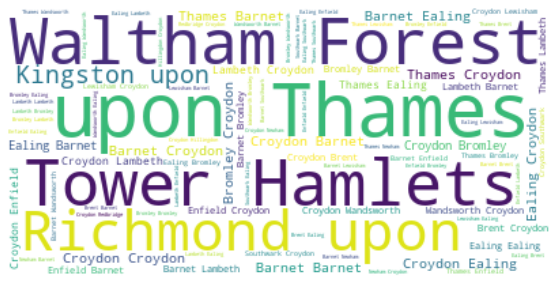

In [89]:
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Menurut word cloud di atas, dari 33 wilayah di London pada dataset, terdapat 2 wilayah yang mendominasi terjadinya kasus kriminalitas yaitu Tower Hamlets dan Waltham Forest.

Hal ini dikarenakan ketiga wilayah tersebut memiliki font tulisan yang lebih besar dibanding lainnya pada word cloud. Untuk "Upon Thames" juga terlihat memiliki frekuensi kemunculan yang banyak kemungkinan dikarenakan terdapat 2 wilayah dengan kata tersebut yaitu Kingston Upon Thames dan Ricmond Upon Thames.

## Folium Maps

Menggambarkan tingkat terjadinya kasus kriminal di berbagai wilayah di London dengan peta Cloropleth

In [90]:
import folium
import geojson as gj 
import json
from folium.features import Choropleth

In [91]:
!wget --quiet https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [92]:
world_map = folium.Map()
world_map

In [93]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

# create a plain world map
london_map = folium.Map(location=[54.237933,-2.36967], zoom_start=5)

# generate choropleth map using the total crime in London from 2008 to 2016
london_map.choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of London'
)

#display map
london_map

C:\Users\VivoBook\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Pada peta Cloropleth di atas dapat dilihat tingkat kasus kriminal di berbagai wilayah di London berdasarkan warna dari kuning hingga merah. 
Warna kuning terang artinya wilayah tersebut memiliki tingkat kasus kriminal rendah, semakin ke kanan yaitu warna merah artinya wilayah tersebut memiliki tingkat kriminal tinggi.

Dari hasil pengamatan diperoleh :
- 1 wilayah berwarna merah yang artinya memiliki tingkat kasus kriminal sangat tinggi yaitu di skala interval 4.2 - 5.0
- 1 wilayah berwarna oranye gelap yang artinya memiliki tingkat kasus kriminal cukup tinggi yaitu di skala interval 2.5 - 3.3
- 1 wilayah berwarna oranye terang yang artinya memiliki tingkat kasus kriminal sedang yaitu di skala interval 1.7 - 2.5
- 3 wilayah berwarna kuning gelap yang artinya memiliki tingkat kasus kriminal rendah yaitu di skala interval 0.8 - 1.7
- sebagian wilayah sisanya berwarna kuning terang yang artinya memiliki tingkat kasus kriminal sangat rendah yaitu di skala interval 0.0 - 0.8

# Kesimpulan

Dari berbagai visualisasi data yang telah dilakukan, diperoleh beberapa informasi dari data London Crime in London 2008 - 2016 sebagai berikut :
- Kasus kriminal di London terendah terjadi pada tahun 2014 sekitar 680.000 kasus dan tertinggi pada tahun 2016 mencapai 740.000 kasus.
- Di tahun 2016, jumlah kasus kriminal paling banyak terjadi di bulan Agustus yaitu sebanyak sekitar 66.000 kasus. 
- Kategori kasus kriminal yang paling banyak terjadi yaitu jenis Other Notifiable Offences dan yang paling sedikit yaitu Theft and Handling.
- 5 wilayah yang memiliki jumlah kasus kriminal tertinggi di London adalah Westminster, Lambeth, Southwark, Camden, dan Newham.
- Wilayah yang paling banyak tercatat dalam data yaitu wilayah Tower Hamlets dan Waltham Forest
- Dari 33 wilayah dalam data, hanya 1 wilayah yang memiliki tingkat kasus kriminal paling tinggi dengan skala interval 4.2 - 5.0, sebagian besar wilayah lainnya memiliki tingkat kasus kriminal rendah hingga sedang.